In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier

In [88]:
def first_ds():
    # Import the dataset
    dataset = pd.read_csv('PI-CAI_features')
    labels = pd.read_csv('PI-CAI_labels')

    # Filter the dataset to include only AI annotations and t2w sequences
    filtered_dataset = dataset[dataset['annotator'] == 'AI']
    filtered_dataset = filtered_dataset[filtered_dataset['sequence'] == 't2w']
    filtered_dataset = filtered_dataset[filtered_dataset['ROI'] == 'lesion']
    filtered_dataset.drop(columns=['annotator', 'sequence', 'ROI_ID', 'img_path', 'seg_path', 'extraction_ID'], inplace=True)
    dataset = filtered_dataset

    # Rename columns to match the labels dataset
    labels.rename(columns={'patient_id': 'patient_ID', 'study_id': 'study_ID'}, inplace=True)

    # We only want Magnetic Resonace Biopsy (MRBx) labels because Systematic Biopsy (SBx) labels are not for our usecase
    # we also remove those that have both because clicinians result might be biased
    labels = labels[labels['histopath_type'] == 'MRBx']

    # Remove useless columns from labels dataset
    labels.drop(columns=['mri_date', 'histopath_type'], inplace=True)

    # Merge the datasets on patient_ID and study_ID
    dataset = pd.merge(dataset, labels, on=['patient_ID', 'study_ID'])
    dataset.drop(columns=['patient_ID', 'study_ID'], inplace=True)
    return dataset

dataset = first_ds()
dataset


ROI  original_shape_Elongation  original_shape_Flatness  \
0    lesion                   0.810849                 0.536311   
1    lesion                   0.561657                 0.342182   
2    lesion                   1.000000                 0.750000   
3    lesion                   0.780025                 0.677932   
4    lesion                   0.831327                 0.604294   
..      ...                        ...                      ...   
238  lesion                   0.696818                 0.528032   
239  lesion                   0.728974                 0.513701   
240  lesion                   0.926146                 0.666006   
241  lesion                   0.861388                 0.818372   
242  lesion                   0.688051                 0.442278   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                          5.872887                       10.950534   
1                          6.991918                       20.433342   
2                          5.196152                        6.928203   
3                         21.790299                       32.142294   
4                         14.592407                       24.147862   
..                              ...                             ...   
238                        8.208732                       15.545889   
239                        8.285579                       16.129199   
240                        6.935291                       10.413252   
241                       10.240434                       12.513179   
242                        5.706496                       12.902509   

     original_shape_Maximum2DDiameterColumn  \
0                                 12.649111   
1                                 15.620499   
2                                  8.000000   
3                                 37.107951   
4                                 24.186773   
..                                      ...   
238                               14.455449   
239                               13.416411   
240                               12.369317   
241                               13.200379   
242                               14.422205   

     original_shape_Maximum2DDiameterRow  \
0                              12.649111   
1                              20.124612   
2                               8.000000   
3                              32.449961   
4                              26.400758   
..                                   ...   
238                            14.718695   
239                            15.620502   
240                            10.440307   
241                            14.500000   
242                            12.649111   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                10.770330                         13.266499   
1                                15.231546                         21.000000   
2                                 8.246211                          8.246211   
3                                34.928498                         38.000000   
4                                26.076810                         28.142495   
..                                     ...                               ...   
238                              17.088007                         17.463104   
239                              18.439089                         19.104973   
240                              12.165525                         12.529964   
241                              14.142136                         15.041609   
242                              10.198039                         14.560220   

     original_shape_MeshVolume  ...  wavelet-LLL_ngtdm_Busyness  \
0                   351.500000  ...                    0.018964   
1                  1004.500000  ...                    0.024734   
2                   154.000000  ...                    0.051788   
3                 12248.000

In [89]:
missing_values = dataset.isnull().sum()
c = 0
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")
        c += 1
if c == 0:
    print("No missing values found in the dataset.")


psa: 5 missing values
psad: 87 missing values
prostate_volume: 5 missing values


In [90]:
def second_ds(print_info=False):
    dataset = first_ds()
    # Remove all rows with missing values
    dataset.dropna(inplace=True)
    missing_values = dataset.isnull().sum()
    c = 0
    for column, count in missing_values.items():
        if count > 0:
            print(f"{column}: {count} missing values")
            c += 1
    if c == 0:
        if print_info:  print("No missing values found in the dataset.")
    # Check for duplicates
    duplicates = dataset.duplicated().sum()
    if duplicates > 0:
        if print_info: print(f"Found {duplicates} duplicate rows in the dataset.")
        #dataset.drop_duplicates(inplace=True)
    else:
        if print_info : print("No duplicate rows found in the dataset.")
    
    return dataset

dataset = second_ds()
dataset

ROI  original_shape_Elongation  original_shape_Flatness  \
0    lesion                   0.810849                 0.536311   
1    lesion                   0.561657                 0.342182   
2    lesion                   1.000000                 0.750000   
3    lesion                   0.780025                 0.677932   
4    lesion                   0.831327                 0.604294   
..      ...                        ...                      ...   
238  lesion                   0.696818                 0.528032   
239  lesion                   0.728974                 0.513701   
240  lesion                   0.926146                 0.666006   
241  lesion                   0.861388                 0.818372   
242  lesion                   0.688051                 0.442278   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                          5.872887                       10.950534   
1                          6.991918                       20.433342   
2                          5.196152                        6.928203   
3                         21.790299                       32.142294   
4                         14.592407                       24.147862   
..                              ...                             ...   
238                        8.208732                       15.545889   
239                        8.285579                       16.129199   
240                        6.935291                       10.413252   
241                       10.240434                       12.513179   
242                        5.706496                       12.902509   

     original_shape_Maximum2DDiameterColumn  \
0                                 12.649111   
1                                 15.620499   
2                                  8.000000   
3                                 37.107951   
4                                 24.186773   
..                                      ...   
238                               14.455449   
239                               13.416411   
240                               12.369317   
241                               13.200379   
242                               14.422205   

     original_shape_Maximum2DDiameterRow  \
0                              12.649111   
1                              20.124612   
2                               8.000000   
3                              32.449961   
4                              26.400758   
..                                   ...   
238                            14.718695   
239                            15.620502   
240                            10.440307   
241                            14.500000   
242                            12.649111   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                10.770330                         13.266499   
1                                15.231546                         21.000000   
2                                 8.246211                          8.246211   
3                                34.928498                         38.000000   
4                                26.076810                         28.142495   
..                                     ...                               ...   
238                              17.088007                         17.463104   
239                              18.439089                         19.104973   
240                              12.165525                         12.529964   
241                              14.142136                         15.041609   
242                              10.198039                         14.560220   

     original_shape_MeshVolume  ...  wavelet-LLL_ngtdm_Busyness  \
0                   351.500000  ...                    0.018964   
1                  1004.500000  ...                    0.024734   
2                   154.000000  ...                    0.051788   
3                 12248.000

In [91]:
def reset():
    return second_ds()

dataset = reset()

In [92]:
# TO DO: Check for zero values

In [93]:
print(tabulate(dataset, headers='keys', tablefmt='psql'))

+-----+--------+-----------------------------+---------------------------+----------------------------------+----------------------------------+------------------------------------------+---------------------------------------+-----------------------------------------+------------------------------------+-----------------------------+----------------------------------+-----------------------------+------------------------------+-------------------------------------+------------------------------+------------------------------------+------------------------------------+------------------------------+-------------------------------+------------------------------------------+--------------------------------+-------------------------------+---------------------------------------------+----------------------------+------------------------------+-------------------------------+-----------------------------+---------------------------------------------------+----------------------------------

In [94]:
reduced = dataset.drop(columns=['lesion_GS'])
correlation_matrix = reduced.corr()


ValueError: could not convert string to float: 'lesion'

In [ ]:
corr_matrix = correlation_matrix.abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
dataset = reset()
dataset.drop(to_drop, axis=1, inplace=True)
print(dataset.columns.tolist())

to_keep_90 = [column for column in dataset.columns if column not in to_drop]

['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_JointEnergy', 'original_glcm_Imc2', 'original_glcm_Idmn', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'log-s

In [ ]:
#to_keep_90 = ['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_JointEnergy', 'original_glcm_Imc2', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'log-sigma-3-0-mm-3D_firstorder_10Percentile', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-3-0-mm-3D_firstorder_Maximum', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'log-sigma-3-0-mm-3D_firstorder_Minimum', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_glcm_ClusterProminence', 'log-sigma-3-0-mm-3D_glcm_ClusterShade', 'log-sigma-3-0-mm-3D_glcm_Contrast', 'log-sigma-3-0-mm-3D_glcm_Correlation', 'log-sigma-3-0-mm-3D_glcm_Imc2', 'log-sigma-3-0-mm-3D_glcm_Idmn', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-3-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_ngtdm_Busyness', 'log-sigma-3-0-mm-3D_ngtdm_Contrast', 'log-sigma-3-0-mm-3D_ngtdm_Strength', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Maximum', 'log-sigma-5-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glcm_Contrast', 'log-sigma-5-0-mm-3D_glcm_Correlation', 'log-sigma-5-0-mm-3D_glcm_DifferenceVariance', 'log-sigma-5-0-mm-3D_glcm_Imc2', 'log-sigma-5-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-5-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_ngtdm_Busyness', 'log-sigma-5-0-mm-3D_ngtdm_Contrast', 'log-sigma-5-0-mm-3D_ngtdm_Strength', 'wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_InterquartileRange', 'wavelet-LLH_firstorder_Kurtosis', 'wavelet-LLH_firstorder_Maximum', 'wavelet-LLH_firstorder_Mean', 'wavelet-LLH_firstorder_Median', 'wavelet-LLH_firstorder_Minimum', 'wavelet-LLH_firstorder_RootMeanSquared', 'wavelet-LLH_firstorder_Skewness', 'wavelet-LLH_firstorder_Variance', 'wavelet-LLH_glcm_ClusterProminence', 'wavelet-LLH_glcm_Correlation', 'wavelet-LLH_glcm_DifferenceVariance', 'wavelet-LLH_glcm_Imc2', 'wavelet-LLH_glcm_Idm', 'wavelet-LLH_glcm_Idmn', 'wavelet-LLH_glrlm_LongRunEmphasis', 'wavelet-LLH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LLH_glszm_LargeAreaEmphasis', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LLH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LLH_ngtdm_Busyness', 'wavelet-LLH_ngtdm_Contrast', 'wavelet-LLH_ngtdm_Strength', 'wavelet-LHL_firstorder_10Percentile', 'wavelet-LHL_firstorder_90Percentile', 'wavelet-LHL_firstorder_Entropy', 'wavelet-LHL_firstorder_InterquartileRange', 'wavelet-LHL_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Maximum', 'wavelet-LHL_firstorder_Mean', 'wavelet-LHL_firstorder_Median', 'wavelet-LHL_firstorder_Minimum', 'wavelet-LHL_firstorder_RootMeanSquared', 'wavelet-LHL_firstorder_Skewness', 'wavelet-LHL_glcm_ClusterProminence', 'wavelet-LHL_glcm_ClusterShade', 'wavelet-LHL_glcm_Correlation', 'wavelet-LHL_glcm_Imc2', 'wavelet-LHL_glcm_Idm', 'wavelet-LHL_glrlm_LongRunEmphasis', 'wavelet-LHL_glszm_LargeAreaEmphasis', 'wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LHL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LHL_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LHL_ngtdm_Busyness', 'wavelet-LHL_ngtdm_Complexity', 'wavelet-LHL_ngtdm_Contrast', 'wavelet-LHL_ngtdm_Strength', 'wavelet-LHH_firstorder_10Percentile', 'wavelet-LHH_firstorder_90Percentile', 'wavelet-LHH_firstorder_Entropy', 'wavelet-LHH_firstorder_Kurtosis', 'wavelet-LHH_firstorder_Maximum', 'wavelet-LHH_firstorder_Mean', 'wavelet-LHH_firstorder_Median', 'wavelet-LHH_firstorder_Minimum', 'wavelet-LHH_firstorder_RootMeanSquared', 'wavelet-LHH_firstorder_Skewness', 'wavelet-LHH_glcm_ClusterProminence', 'wavelet-LHH_glcm_Correlation', 'wavelet-LHH_glcm_Idm', 'wavelet-LHH_glrlm_LongRunEmphasis', 'wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LHH_glszm_LargeAreaEmphasis', 'wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LHH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LHH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LHH_ngtdm_Busyness', 'wavelet-LHH_ngtdm_Contrast', 'wavelet-LHH_ngtdm_Strength', 'wavelet-HLL_firstorder_10Percentile', 'wavelet-HLL_firstorder_90Percentile', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-HLL_firstorder_Kurtosis', 'wavelet-HLL_firstorder_Maximum', 'wavelet-HLL_firstorder_Mean', 'wavelet-HLL_firstorder_Median', 'wavelet-HLL_firstorder_Minimum', 'wavelet-HLL_firstorder_Skewness', 'wavelet-HLL_glcm_ClusterProminence', 'wavelet-HLL_glcm_ClusterShade', 'wavelet-HLL_glcm_Correlation', 'wavelet-HLL_glcm_Idm', 'wavelet-HLL_glcm_Idmn', 'wavelet-HLL_glrlm_LongRunEmphasis', 'wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HLL_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-HLL_ngtdm_Busyness', 'wavelet-HLL_ngtdm_Contrast', 'wavelet-HLL_ngtdm_Strength', 'wavelet-HLH_firstorder_10Percentile', 'wavelet-HLH_firstorder_90Percentile', 'wavelet-HLH_firstorder_Entropy', 'wavelet-HLH_firstorder_Kurtosis', 'wavelet-HLH_firstorder_Maximum', 'wavelet-HLH_firstorder_Mean', 'wavelet-HLH_firstorder_Median', 'wavelet-HLH_firstorder_Minimum', 'wavelet-HLH_firstorder_RootMeanSquared', 'wavelet-HLH_firstorder_Skewness', 'wavelet-HLH_glcm_ClusterProminence', 'wavelet-HLH_glcm_Correlation', 'wavelet-HLH_glcm_Idm', 'wavelet-HLH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-HLH_glszm_LargeAreaEmphasis', 'wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-HLH_ngtdm_Busyness', 'wavelet-HLH_ngtdm_Complexity', 'wavelet-HLH_ngtdm_Strength', 'wavelet-HHL_firstorder_10Percentile', 'wavelet-HHL_firstorder_90Percentile', 'wavelet-HHL_firstorder_InterquartileRange', 'wavelet-HHL_firstorder_Kurtosis', 'wavelet-HHL_firstorder_Maximum', 'wavelet-HHL_firstorder_Mean', 'wavelet-HHL_firstorder_Median', 'wavelet-HHL_firstorder_Minimum', 'wavelet-HHL_firstorder_RootMeanSquared', 'wavelet-HHL_firstorder_Skewness', 'wavelet-HHL_glcm_ClusterProminence', 'wavelet-HHL_glcm_ClusterShade', 'wavelet-HHL_glcm_Correlation', 'wavelet-HHL_glcm_Idm', 'wavelet-HHL_glrlm_LongRunEmphasis', 'wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HHL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HHL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HHL_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-HHL_ngtdm_Busyness', 'wavelet-HHL_ngtdm_Contrast', 'wavelet-HHL_ngtdm_Strength', 'wavelet-HHH_firstorder_10Percentile', 'wavelet-HHH_firstorder_Kurtosis', 'wavelet-HHH_firstorder_Maximum', 'wavelet-HHH_firstorder_Mean', 'wavelet-HHH_firstorder_Median', 'wavelet-HHH_firstorder_Minimum', 'wavelet-HHH_firstorder_RootMeanSquared', 'wavelet-HHH_firstorder_Skewness', 'wavelet-HHH_glcm_ClusterProminence', 'wavelet-HHH_glcm_ClusterShade', 'wavelet-HHH_glcm_Correlation', 'wavelet-HHH_glcm_Idm', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-HHH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HHH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HHH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-HHH_ngtdm_Busyness', 'wavelet-HHH_ngtdm_Contrast', 'wavelet-HHH_ngtdm_Strength', 'wavelet-LLL_firstorder_Kurtosis', 'wavelet-LLL_firstorder_Skewness', 'wavelet-LLL_glcm_Idm', 'wavelet-LLL_glszm_LargeAreaEmphasis', 'wavelet-LLL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Contrast', 'wavelet-LLL_ngtdm_Strength', 'patient_age', 'psa', 'psad', 'prostate_volume', 'lesion_GS']
to_keep_85 = ['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_Sphericity', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Kurtosis', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_glcm_ClusterProminence', 'original_glcm_Contrast', 'original_glcm_JointEnergy', 'original_glcm_Imc2', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-3-0-mm-3D_firstorder_Maximum', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_glcm_Contrast', 'log-sigma-3-0-mm-3D_glcm_Imc2', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_ngtdm_Busyness', 'log-sigma-3-0-mm-3D_ngtdm_Contrast', 'log-sigma-3-0-mm-3D_ngtdm_Strength', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glcm_Contrast', 'log-sigma-5-0-mm-3D_glcm_Imc2', 'log-sigma-5-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_ngtdm_Busyness', 'log-sigma-5-0-mm-3D_ngtdm_Contrast', 'log-sigma-5-0-mm-3D_ngtdm_Strength', 'wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_InterquartileRange', 'wavelet-LLH_firstorder_Kurtosis', 'wavelet-LLH_firstorder_Maximum', 'wavelet-LLH_firstorder_Mean', 'wavelet-LLH_firstorder_Minimum', 'wavelet-LLH_firstorder_Skewness', 'wavelet-LLH_glcm_ClusterProminence', 'wavelet-LLH_glcm_Correlation', 'wavelet-LLH_glcm_Idm', 'wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LLH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LLH_ngtdm_Busyness', 'wavelet-LLH_ngtdm_Contrast', 'wavelet-LLH_ngtdm_Strength', 'wavelet-LHL_firstorder_10Percentile', 'wavelet-LHL_firstorder_90Percentile', 'wavelet-LHL_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Maximum', 'wavelet-LHL_firstorder_Mean', 'wavelet-LHL_firstorder_Median', 'wavelet-LHL_firstorder_Minimum', 'wavelet-LHL_firstorder_RootMeanSquared', 'wavelet-LHL_firstorder_Skewness', 'wavelet-LHL_glcm_ClusterShade', 'wavelet-LHL_glcm_Correlation', 'wavelet-LHL_glcm_Idm', 'wavelet-LHL_glrlm_LongRunEmphasis', 'wavelet-LHL_glszm_LargeAreaEmphasis', 'wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LHL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LHL_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LHL_ngtdm_Busyness', 'wavelet-LHL_ngtdm_Contrast', 'wavelet-LHL_ngtdm_Strength', 'wavelet-LHH_firstorder_10Percentile', 'wavelet-LHH_firstorder_90Percentile', 'wavelet-LHH_firstorder_Kurtosis', 'wavelet-LHH_firstorder_Maximum', 'wavelet-LHH_firstorder_Mean', 'wavelet-LHH_firstorder_Median', 'wavelet-LHH_firstorder_Skewness', 'wavelet-LHH_glcm_ClusterProminence', 'wavelet-LHH_glszm_LargeAreaEmphasis', 'wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LHH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LHH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LHH_ngtdm_Busyness', 'wavelet-LHH_ngtdm_Contrast', 'wavelet-LHH_ngtdm_Strength', 'wavelet-HLL_firstorder_10Percentile', 'wavelet-HLL_firstorder_90Percentile', 'wavelet-HLL_firstorder_Kurtosis', 'wavelet-HLL_firstorder_Maximum', 'wavelet-HLL_firstorder_Mean', 'wavelet-HLL_firstorder_Minimum', 'wavelet-HLL_firstorder_Skewness', 'wavelet-HLL_glcm_ClusterProminence', 'wavelet-HLL_glcm_ClusterShade', 'wavelet-HLL_glcm_Correlation', 'wavelet-HLL_glrlm_LongRunEmphasis', 'wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HLL_ngtdm_Busyness', 'wavelet-HLL_ngtdm_Contrast', 'wavelet-HLL_ngtdm_Strength', 'wavelet-HLH_firstorder_10Percentile', 'wavelet-HLH_firstorder_90Percentile', 'wavelet-HLH_firstorder_Kurtosis', 'wavelet-HLH_firstorder_Maximum', 'wavelet-HLH_firstorder_Mean', 'wavelet-HLH_firstorder_Median', 'wavelet-HLH_firstorder_Minimum', 'wavelet-HLH_firstorder_RootMeanSquared', 'wavelet-HLH_firstorder_Skewness', 'wavelet-HLH_glcm_Idm', 'wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HLH_ngtdm_Busyness', 'wavelet-HLH_ngtdm_Strength', 'wavelet-HHL_firstorder_10Percentile', 'wavelet-HHL_firstorder_Kurtosis', 'wavelet-HHL_firstorder_Maximum', 'wavelet-HHL_firstorder_Mean', 'wavelet-HHL_firstorder_Median', 'wavelet-HHL_firstorder_Minimum', 'wavelet-HHL_firstorder_RootMeanSquared', 'wavelet-HHL_firstorder_Skewness', 'wavelet-HHL_glcm_ClusterShade', 'wavelet-HHL_glcm_Correlation', 'wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HHL_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HHL_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HHL_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-HHL_ngtdm_Busyness', 'wavelet-HHL_ngtdm_Contrast', 'wavelet-HHH_firstorder_10Percentile', 'wavelet-HHH_firstorder_Kurtosis', 'wavelet-HHH_firstorder_Maximum', 'wavelet-HHH_firstorder_Mean', 'wavelet-HHH_firstorder_Median', 'wavelet-HHH_firstorder_RootMeanSquared', 'wavelet-HHH_firstorder_Skewness', 'wavelet-HHH_glcm_ClusterShade', 'wavelet-HHH_glcm_Correlation', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-HHH_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized', 'wavelet-HHH_gldm_LargeDependenceLowGrayLevelEmphasis', 'wavelet-LLL_firstorder_Kurtosis', 'wavelet-LLL_firstorder_Skewness', 'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Contrast', 'patient_age', 'psa', 'psad', 'prostate_volume', 'lesion_GS']

len(to_keep_90), len(to_keep_85)

(256, 180)

In [ ]:
def r_reset(corr_threshold_90=True):
    dataset = reset()
    return dataset[to_keep_90] if corr_threshold_90 else dataset[to_keep_85]

dataset = r_reset(corr_threshold_90=True)

In [ ]:
# Now let's figure out something about lesion_GS
dataset['lesion_GS'].unique()

array(['4+3,0+0', '3+4', 'N/A,N/A,N/A,3+4', '4+3', '0+0', '3+4,3+3',
       '3+3', '3+4,N/A,N/A', '2+3', '3+3,N/A', '0+0,0+0', '4+4',
       '3+4,N/A', 'N/A,0+0,0+0', 'N/A,0+0,N/A', 'N/A,0+0', '0+0,N/A,N/A',
       '4+5', '4+4,0+0,N/A', '3+3,3+3', 'N/A,0+0,4+4', '4+3,3+3,3+4',
       '4+5,N/A', '3+2,N/A', '3+4,3+4', '3+4,3+4,3+3', '0+0,N/A',
       '3+4,4+3,3+3', 'N/A,0+0,4+3', '5+4', '3+4,0+0', '4+3,N/A',
       '3+2,0+0', '4+5,0+0,0+0,N/A', '2+3,N/A,N/A', '4+4,3+2',
       'N/A,N/A,0+0', '4+4,N/A', 'N/A,4+3', '4+3,3+4', '0+0,N/A,3+3',
       '3+4,3+3,3+3', '4+3,3+3', '3+3,0+0', '3+4,0+0,0+0', '0+0,4+3',
       '3+3,0+0,N/A', '2+4', '3+4,N/A,3+3', '0+0,0+0,0+0',
       '0+0,0+0,N/A,N/A', '3+4,N/A,0+0', '3+3,N/A,N/A', 'N/A,3+4',
       'N/A,3+3,0+0', '5+3', '3+5', 'N/A,N/A,0+0,0+0', '0+0,N/A,0+0,0+0',
       '0+0,0+0,N/A', '3+4,3+4,0+0', '0+0,3+3', '4+5,0+0', '3+3,3+4',
       '3+4,4+3', '3+4,3+3,N/A', '0+0,3+4', '0+0,N/A,3+4',
       '3+3,N/A,N/A,N/A', '3+4,0+0,N/A'], dtype=object)

In [ ]:
# Prima suddivisione (easy version)
# Prostata con lesione magligna
# Prostata senza lesione maligna (solo benigne)
# Ipotizziamo che N/A sia benigno
# Ipotizziamo GS >= 6 come maligno
def df_reset(gs_threshold=6, keep_gs=False, corr_threshold_90=True):
    dataset = r_reset(corr_threshold_90=corr_threshold_90)
    dataset['lesion_GS'] = dataset['lesion_GS'].str.replace('N/A', '0')
    dataset['lesion_GS'] = dataset['lesion_GS'].apply(lambda x: eval(x))
    dataset['lesion_GS'] = dataset['lesion_GS'].apply(lambda x: max(x) if isinstance(x, tuple) else x)
    dataset['malignant'] = dataset['lesion_GS'].apply(lambda x: 1 if x >= gs_threshold else 0)
    if not keep_gs:
        dataset.drop(columns=['lesion_GS'], inplace=True)
    return dataset

dataset = df_reset(gs_threshold=6, keep_gs=False, corr_threshold_90=True)

In [ ]:
dataset.shape

(481, 256)

### Data Prep

In [ ]:
# TIME TO FINALLY MAKE SOME MODELS
# List of models
# Logistic Regression
# Decision Tree
# Random Forest
# K-Nearest Neighbors (KNN)
# Neural Networks

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['malignant']), dataset['malignant'], test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### Log Reg

Logistic Regression Accuracy: 0.7938144329896907
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.39      0.41        18
           1       0.86      0.89      0.88        79

    accuracy                           0.79        97
   macro avg       0.65      0.64      0.64        97
weighted avg       0.79      0.79      0.79        97



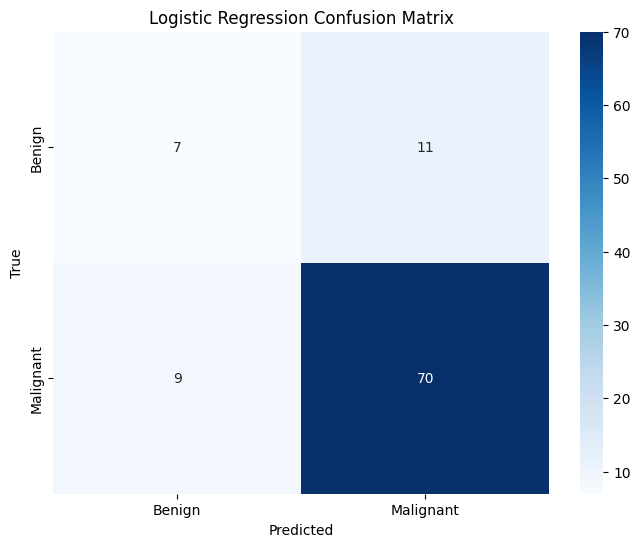

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### MLP

MLP Accuracy: 0.8350515463917526
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.89      0.91      0.90        79

    accuracy                           0.84        97
   macro avg       0.73      0.71      0.71        97
weighted avg       0.83      0.84      0.83        97



Text(0.5, 36.72222222222221, 'Predicted')

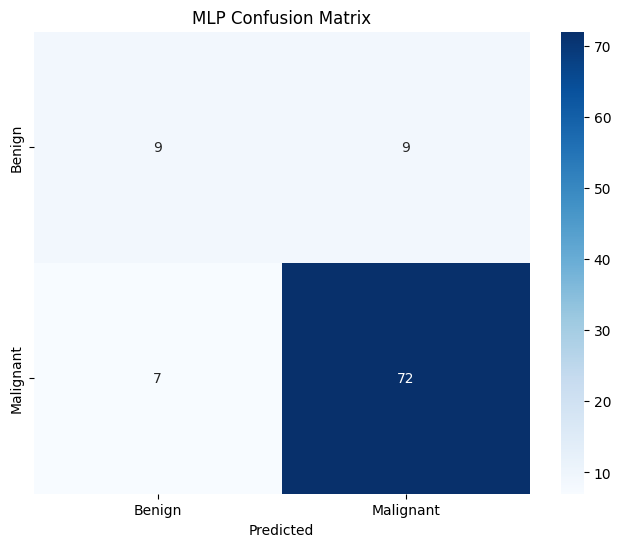

In [ ]:
# MLP, my best friend
mlp = MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(100, 50, 50, 50, 50), activation='relu', solver='adam')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)

print("MLP Accuracy:", mlp_accuracy)
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')


### Decision Tree

Decision Tree Accuracy: 0.7216494845360825
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.39      0.34        18
           1       0.85      0.80      0.82        79

    accuracy                           0.72        97
   macro avg       0.58      0.59      0.58        97
weighted avg       0.75      0.72      0.73        97



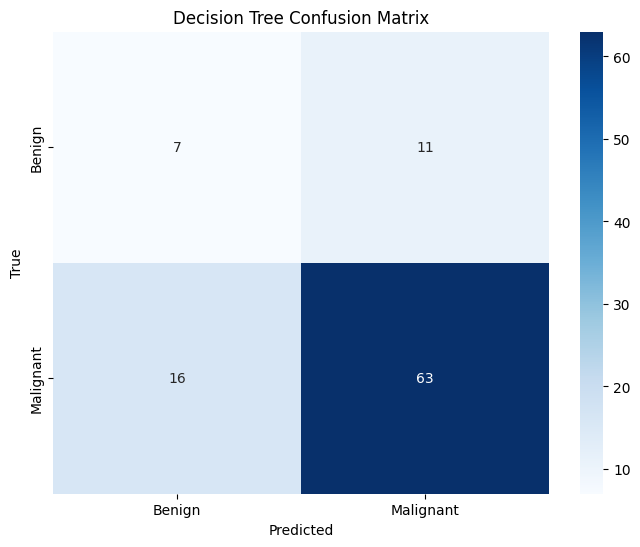

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

dt_cm = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Random Forest

Random Forest Accuracy: 0.845360824742268
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44        18
           1       0.86      0.96      0.91        79

    accuracy                           0.85        97
   macro avg       0.77      0.65      0.68        97
weighted avg       0.83      0.85      0.82        97



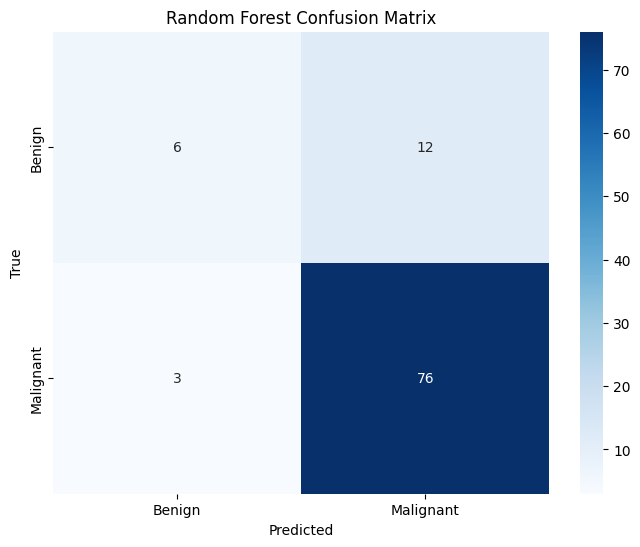

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### KNN

KNN Accuracy: 0.7731958762886598
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.28      0.31        18
           1       0.84      0.89      0.86        79

    accuracy                           0.77        97
   macro avg       0.60      0.58      0.59        97
weighted avg       0.75      0.77      0.76        97



C:\Users\ago19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Impossibile trovare il file specificato
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ago19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.1008.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 554, in run
    wi

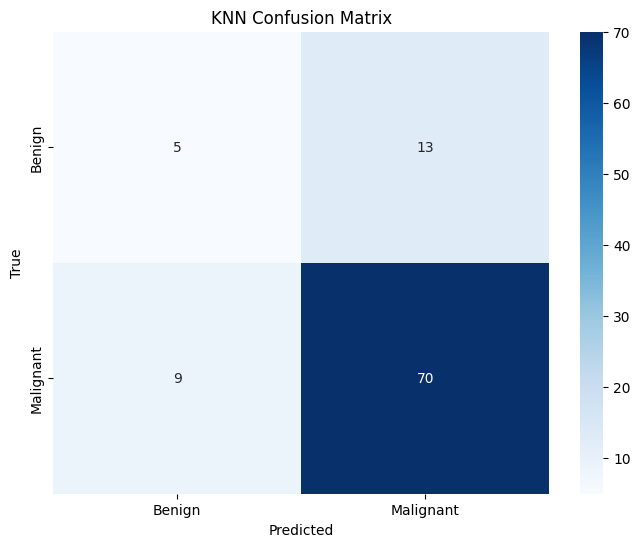

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_cm = confusion_matrix(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Results

C:\Users\ago19\AppData\Local\Temp\ipykernel_4408\3954363165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


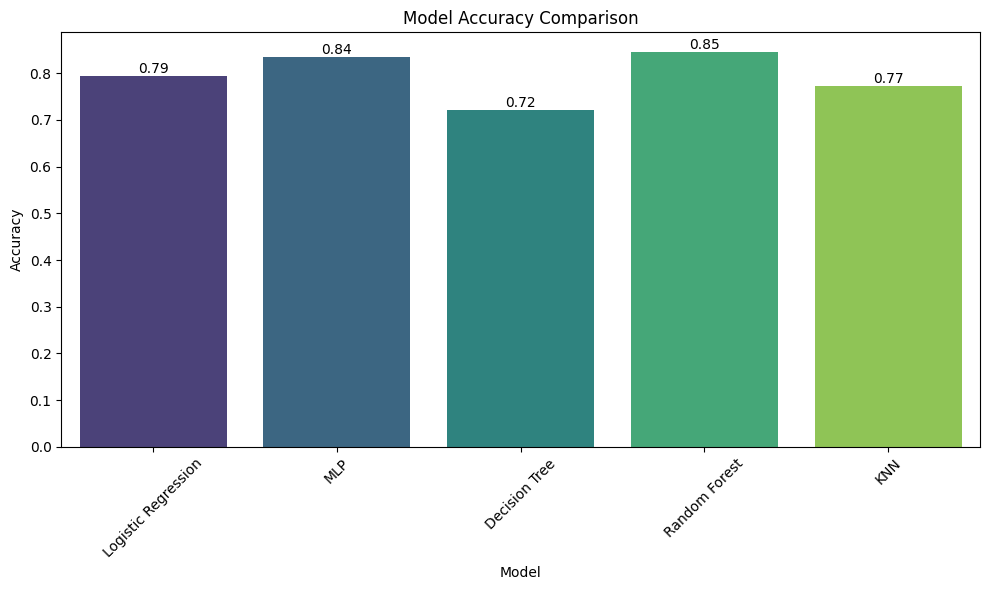

In [ ]:
# Resume all results in graphs

results = {
    'Logistic Regression': log_reg_accuracy,
    'MLP': mlp_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'KNN': knn_accuracy
}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### PCA

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca_dataset = df_reset()
pca = PCA(n_components=10)

pca_result = pca.fit_transform(pca_dataset)

for val in pca.explained_variance_ratio_:
    print('\u03BB ' + str(val))


    



λ 0.6436529303777025
λ 0.2119976562190161
λ 0.07340331258870167
λ 0.045482051390419304
λ 0.012373669418860452
λ 0.004831565983577913
λ 0.0035780739642451427
λ 0.0025832449296400643
λ 0.0008470482642566505
λ 0.00033477296568932966


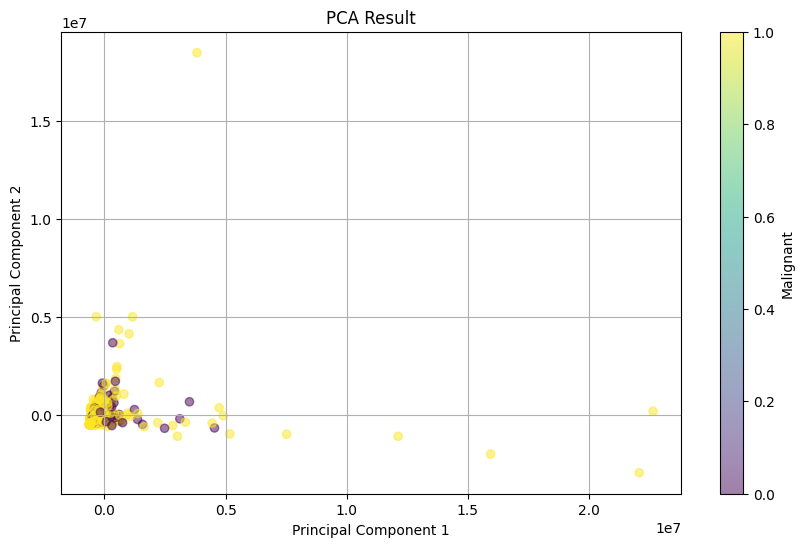

In [ ]:
# Plotting the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_dataset['malignant'], cmap='viridis', alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Malignant')
plt.grid()
plt.show()

## Feature Importance

### Log Reg

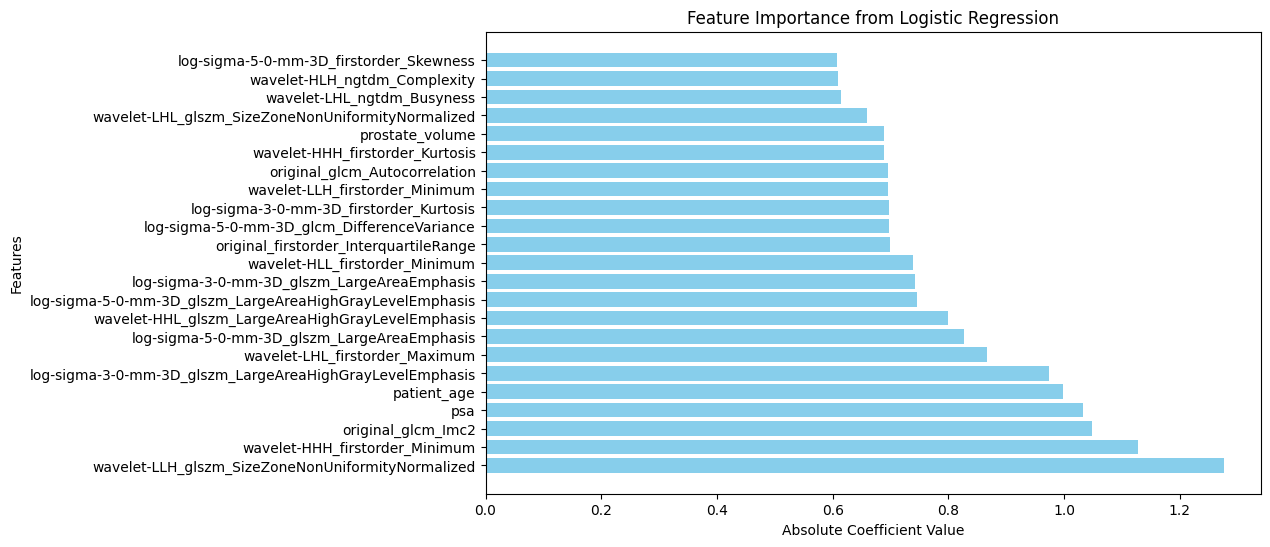

In [ ]:
lr_fi = pd.Series(np.abs(log_reg.coef_[0]), index=dataset.drop(columns=['malignant']).columns)
lr_fi = lr_fi.sort_values(ascending=False)
lr_fi = lr_fi[lr_fi > 0.6]  # Filter out small coefficients
plt.figure(figsize=(10, 6))
plt.barh(lr_fi.index, lr_fi.values, color='skyblue')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

### Decision Tree

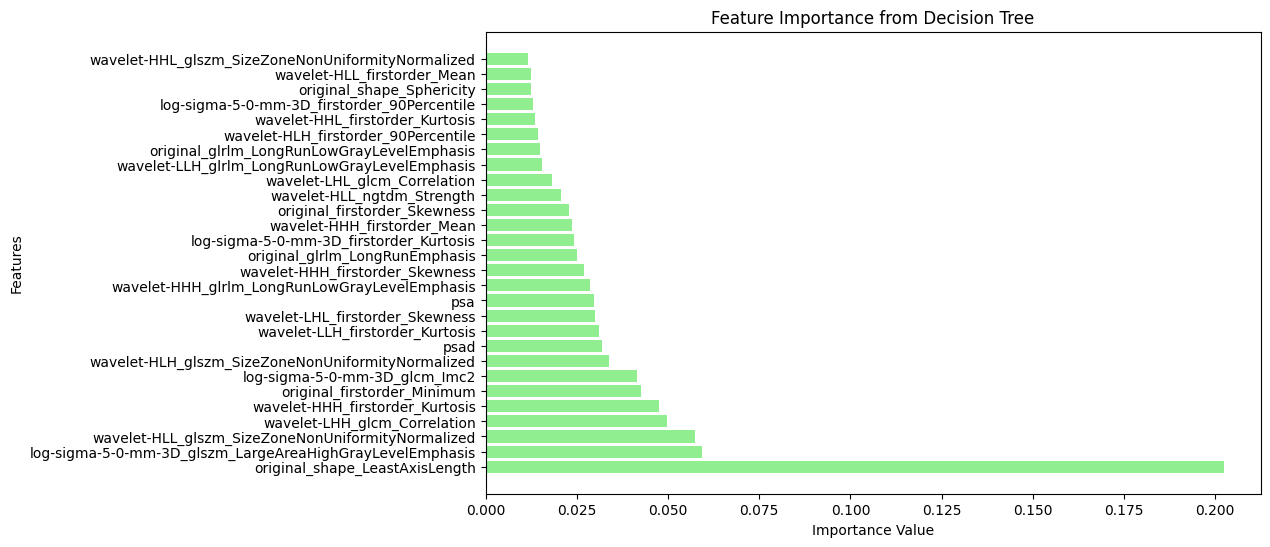

In [ ]:
# Decision Tree Feature Importance
dt_fi = pd.Series(dt.feature_importances_, index=dataset.drop(columns=['malignant']).columns)
dt_fi = dt_fi.sort_values(ascending=False)
dt_fi = dt_fi[dt_fi > 0.01]  # Filter out small importances
plt.figure(figsize=(10, 6))
plt.barh(dt_fi.index, dt_fi.values, color='lightgreen')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

### Random Forest

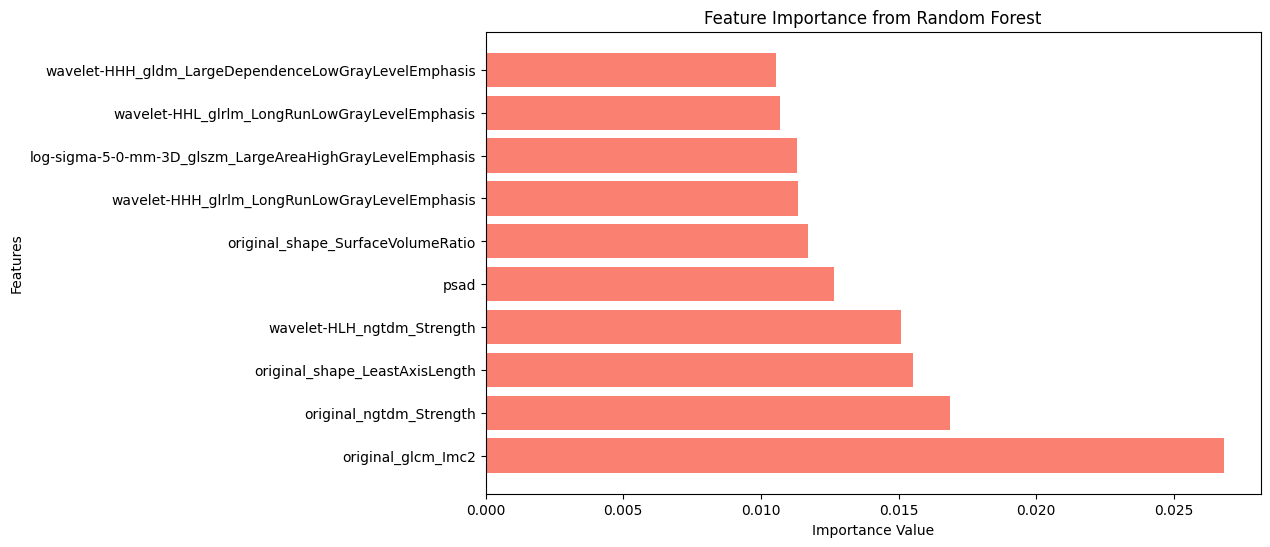

In [ ]:
# Random Forest Feature Importance
rf_fi = pd.Series(rf.feature_importances_, index=dataset.drop(columns=['malignant']).columns)
rf_fi = rf_fi.sort_values(ascending=False)
rf_fi = rf_fi[rf_fi > 0.01]  # Filter out small importances
plt.figure(figsize=(10, 6))
plt.barh(rf_fi.index, rf_fi.values, color='salmon')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

## Feature Summary

In [ ]:
res = (set(lr_fi.index) & set(dt_fi.index) & set(rf_fi.index))
#print(res)

for r in res:
    print(r) 
    print("Log Reg: ", lr_fi.index.get_loc(r))
    print("Decision Tree: ", dt_fi.index.get_loc(r))
    print("Random Forest: ", rf_fi.index.get_loc(r))

log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis
Log Reg:  9
Decision Tree:  1
Random Forest:  7


In [ ]:
print(lr_fi.head(10))


wavelet-LLH_glszm_SizeZoneNonUniformityNormalized           1.275776
wavelet-HHH_firstorder_Minimum                              1.128144
original_glcm_Imc2                                          1.048874
psa                                                         1.032292
patient_age                                                 0.998606
log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis    0.973718
wavelet-LHL_firstorder_Maximum                              0.866346
log-sigma-5-0-mm-3D_glszm_LargeAreaEmphasis                 0.827734
wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis            0.799130
log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis    0.746385
dtype: float64


In [ ]:
print(dt_fi.head(10))

original_shape_LeastAxisLength                              0.202283
log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis    0.059399
wavelet-HLL_glszm_SizeZoneNonUniformityNormalized           0.057385
wavelet-LHH_glcm_Correlation                                0.049777
wavelet-HHH_firstorder_Kurtosis                             0.047668
original_firstorder_Minimum                                 0.042532
log-sigma-5-0-mm-3D_glcm_Imc2                               0.041437
wavelet-HLH_glszm_SizeZoneNonUniformityNormalized           0.033955
psad                                                        0.031985
wavelet-LLH_firstorder_Kurtosis                             0.031013
dtype: float64


In [ ]:
print(rf_fi.head(10))

original_glcm_Imc2                                          0.026807
original_ngtdm_Strength                                     0.016855
original_shape_LeastAxisLength                              0.015532
wavelet-HLH_ngtdm_Strength                                  0.015100
psad                                                        0.012656
original_shape_SurfaceVolumeRatio                           0.011695
wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis               0.011346
log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis    0.011302
wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis               0.010699
wavelet-HHH_gldm_LargeDependenceLowGrayLevelEmphasis        0.010551
dtype: float64
